# Debug

In [9]:
import psutil
p = psutil.Process()
p.cpu_affinity([0])

import os
import json
import numpy as np 
import matplotlib.pyplot as plt
import corner
from scipy.special import logsumexp


# Improved corner kwargs
default_corner_kwargs = dict(bins=40, 
                        smooth=1., 
                        show_titles=False,
                        label_kwargs=dict(fontsize=16),
                        title_kwargs=dict(fontsize=16), 
                        color="blue",
                        # quantiles=[],
                        # levels=[0.9],
                        plot_density=True, 
                        plot_datapoints=False, 
                        fill_contours=True,
                        max_n_ticks=4, 
                        min_n_ticks=3,
                        truth_color = "red",
                        save=False)

In [2]:
pbilby_file = "/home/thibeau.wouters/jim_pbilby_samples/older_bilby_version/GW170817_TF2_with_tukey_fix_result.json"

In [17]:
def get_rejection_sample_idx(weights):
    weights = np.array(weights)
    keep = weights > np.random.uniform(0, max(weights), weights.shape)
    return keep

with open(pbilby_file, "r") as f:
    pbilby_data = json.load(f)
    metadata = pbilby_data["meta_data"]
    
    # config_file = metadata["config_file"]
    # data_dump_file = metadata["data_dump_file"]
    # command_line_args = metadata["command_line_args"]

    samples = pbilby_data["samples"]['content']
    print(np.shape(samples))
    
    nested_samples = pbilby_data["nested_samples"]['content']
    weights = nested_samples["weights"]
    
    keep = get_rejection_sample_idx(weights)
    
    nested_samples.pop("weights")
    nested_samples.pop("log_likelihood")
    param_names = list(nested_samples.keys())
    
    nested_samples_array = np.array([nested_samples[param] for param in param_names]).T

(44782, 13)


1/3
2/3
3/3
4/3


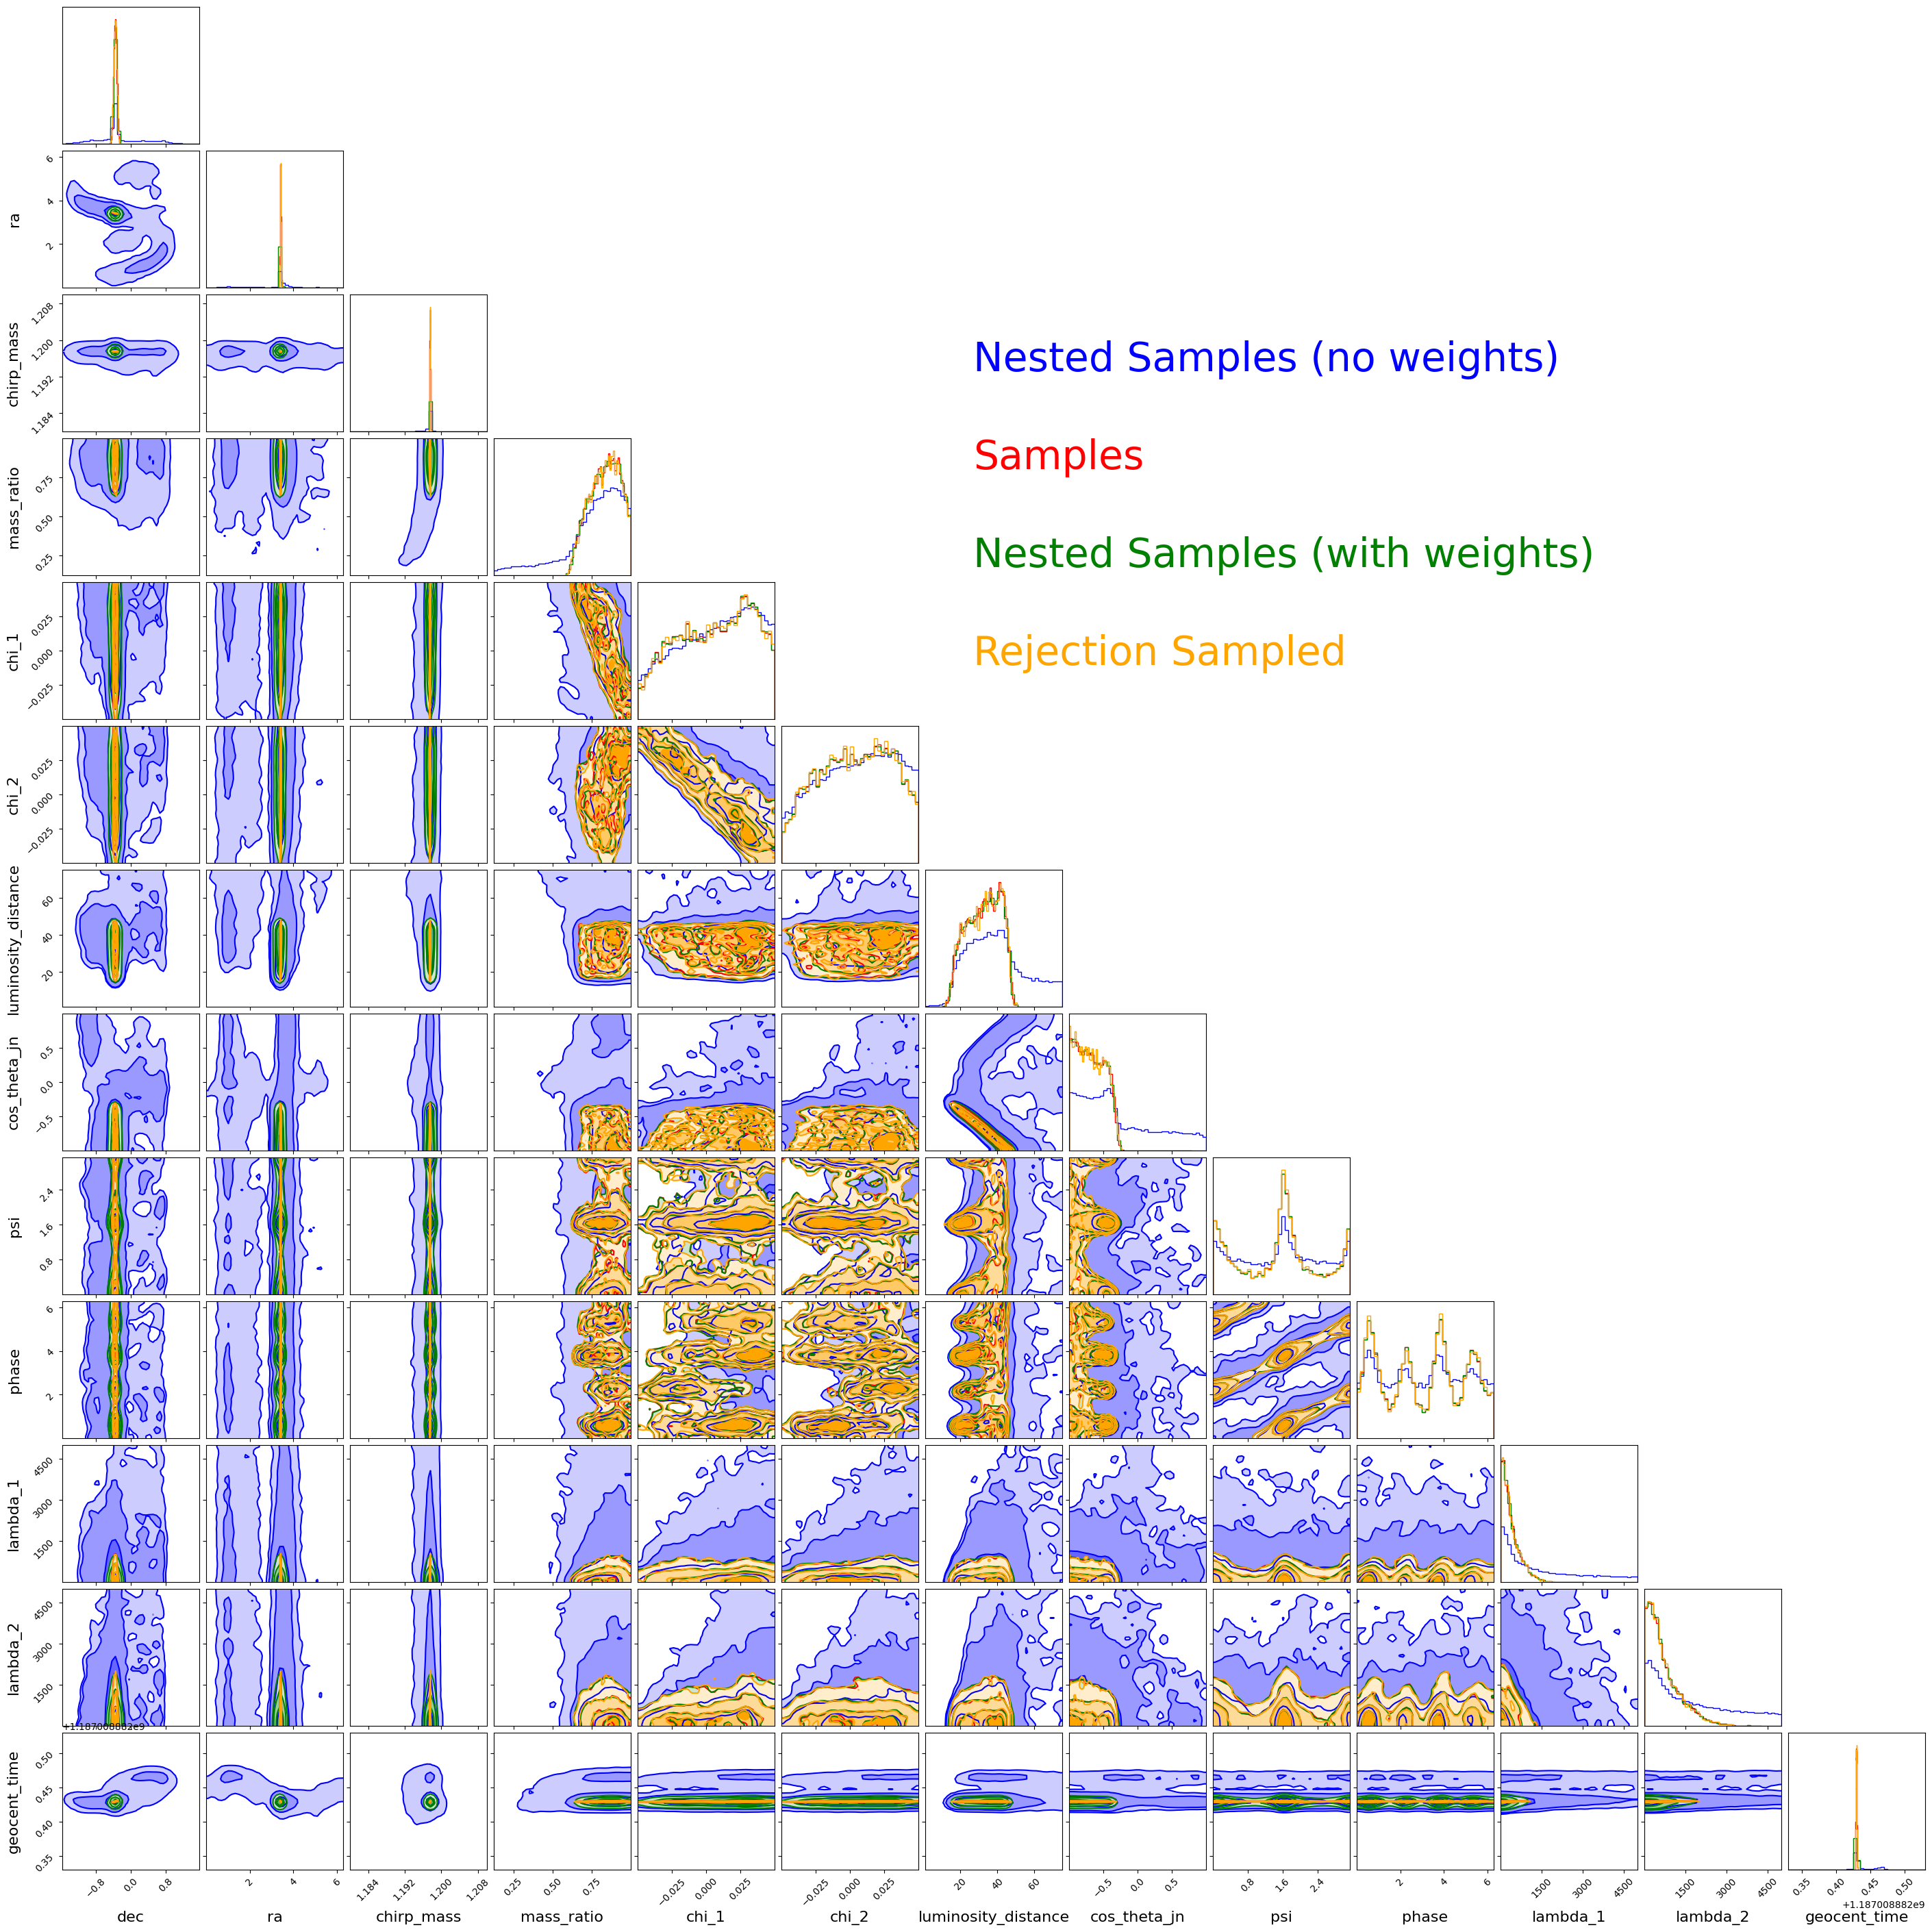

In [19]:
corner_kwargs = default_corner_kwargs
corner_kwargs["color"] = "blue"
hist_kwargs = dict(density=True, color="blue")
corner_kwargs["hist_kwargs"] = hist_kwargs

print("1/3")
fig = corner.corner(np.array(nested_samples_array), labels=param_names, **corner_kwargs)
corner_kwargs["color"] = "red"
hist_kwargs = dict(density=True, color="red")
corner_kwargs["hist_kwargs"] = hist_kwargs
print("2/3")
corner.corner(np.array(samples), fig=fig, labels=param_names, **corner_kwargs)

corner_kwargs["color"] = "green"
hist_kwargs = dict(density=True, color="green")
corner_kwargs["hist_kwargs"] = hist_kwargs
print("3/3")
corner.corner(np.array(nested_samples_array), fig=fig, weights=weights, labels=param_names, **corner_kwargs)

my_samples = np.array(nested_samples_array)[keep]

corner_kwargs["color"] = "orange"
hist_kwargs = dict(density=True, color="orange")
corner_kwargs["hist_kwargs"] = hist_kwargs
print("4/3")
corner.corner(my_samples, fig=fig, labels=param_names, **corner_kwargs)

fs = 42
plt.text(0.5, 0.80, "Nested Samples (no weights)", color="blue", fontsize=fs, transform=plt.gcf().transFigure)
plt.text(0.5, 0.75, "Samples", color="red", fontsize=fs, transform=plt.gcf().transFigure)
plt.text(0.5, 0.70, "Nested Samples (with weights)", color="green", fontsize=fs, transform=plt.gcf().transFigure)
plt.text(0.5, 0.65, "Rejection Sampled", color="orange", fontsize=fs, transform=plt.gcf().transFigure)

plt.show()
plt.close()

# ==== ARCHIVE ====

In [4]:
# jim_out_file = "/home/thibeau.wouters/TurboPE-BNS/real_events/GW170817_NRTidalv2/outdir/results_production.npz"

In [5]:
# data = np.load(jim_out_file)

# log_prob = data["log_prob"]
# chains = data["chains"]

# mc = chains[:, :, 0].flatten()
# log_prob = log_prob.flatten()

# # # histogram
# # plt.hist(log_prob, bins=100, density=True, alpha=0.6, color='g')
# # plt.show()

# # plot
# plt.plot(mc, log_prob, 'o')
# plt.show()
# plt.close()

# def log_prob_to_weights(log_prob):
#     log_prob_normalized = log_prob - logsumexp(log_prob)
#     weights = np.exp(log_prob_normalized)
#     return weights

# new_log_prob = log_prob_to_weights(log_prob)

# # plot
# plt.plot(mc, new_log_prob, 'o')
# plt.show()
# plt.close()

# new_log_prob = np.exp(log_prob)

# # plot
# plt.plot(mc, new_log_prob, 'o')
# plt.show()
# plt.close()